In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error
from sklearn.utils import resample
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt


In [ ]:
# Load data
df_train = pd.read_csv('/content/train.csv')
df_test = pd.read_csv('/content/test.csv')

In [ ]:
# Check data integrity
print('Data loaded successfully.')
print('Train data shape:', df_train.shape)
print('Test data shape:', df_test.shape)
print('Columns in train data:', df_train.columns)
print('Columns in test data:', df_test.columns)

Data loaded successfully.
Train data shape: (7352, 563)
Test data shape: (2947, 563)
Columns in train data: Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity'],
      dtype='object', length=563)
Columns in test data: Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()

In [ ]:
# Check for missing values
print(df_train.isnull().sum())
print(df_test.isnull().sum())

tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64
tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64


In [ ]:
# Fill missing values with zeros
df_train.fillna(0, inplace=True)
df_test.fillna(0, inplace=True)

In [ ]:
# Check again for missing values
print(df_train.isnull().sum())
print(df_test.isnull().sum())


tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64
tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64


In [ ]:
# Encode categorical labels
label_mapping = {
    'STANDING': 1,
    'SITTING': 2,
    'LAYING': 3,
    'WALKING': 4,
    'WALKING_DOWNSTAIRS': 5,
    'WALKING_UPSTAIRS': 6
}
df_train['Activity'] = df_train['Activity'].map(label_mapping)
df_test['Activity'] = df_test['Activity'].map(label_mapping)

In [ ]:
# Splitting the data into features and labels
X_train = df_train.drop('Activity', axis=1)
y_train = df_train['Activity']
X_test = df_test.drop('Activity', axis=1)
y_test = df_test['Activity']

print("NaN values in y_train:", y_train.isnull().sum())
print("NaN values in y_test:", y_test.isnull().sum())

NaN values in y_train: 0
NaN values in y_test: 0


In [ ]:
# Fill NaN values in y_train and y_test with zeros
y_train.fillna(0, inplace=True)
y_test.fillna(0, inplace=True)

In [ ]:
#initializing models
log_reg = make_pipeline(SimpleImputer(strategy='mean'), LogisticRegression(max_iter=1000))
svm = make_pipeline(SimpleImputer(strategy='mean'), SVC())
decision_tree = DecisionTreeClassifier()
naive_bayes = GaussianNB()
mlp = MLPClassifier(max_iter=1000)

models = [
    ('Logistic Regression', log_reg),
    ('SVM', svm),
    ('Decision Tree', decision_tree),
    ('Naive Bayes', naive_bayes),
    ('MLP', mlp)
]

In [ ]:
# Bootstrapping function
def bootstrap(model, X_train, y_train, X_test, y_test, n_iterations=100):
    accuracies = []
    for _ in range(n_iterations):
        X_boot, y_boot = resample(X_train, y_train)
        model.fit(X_boot, y_boot)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)
    return accuracies

In [ ]:
# Results dictionary to store accuracies and uncertainties
results = {}
uncertainties = {}

In [ ]:
# Bootstrap each model and calculate uncertainties
for name, model in models:
    model_accuracies = bootstrap(model, X_train, y_train, X_test, y_test)
    mean_accuracy = np.mean(model_accuracies)
    std_dev = np.std(model_accuracies)
    results[name] = mean_accuracy
    uncertainties[name] = std_dev

In [ ]:
# Display results
print('Model accuracies:')
for model, acc in results.items():
    print(f'{model}: {acc:.4f} ± {uncertainties[model]:.4f}')

Model accuracies:
Logistic Regression: 0.9572 ± 0.0023
SVM: 0.9296 ± 0.0030
Decision Tree: 0.8472 ± 0.0106
Naive Bayes: 0.7331 ± 0.0571
MLP: 0.9401 ± 0.0044


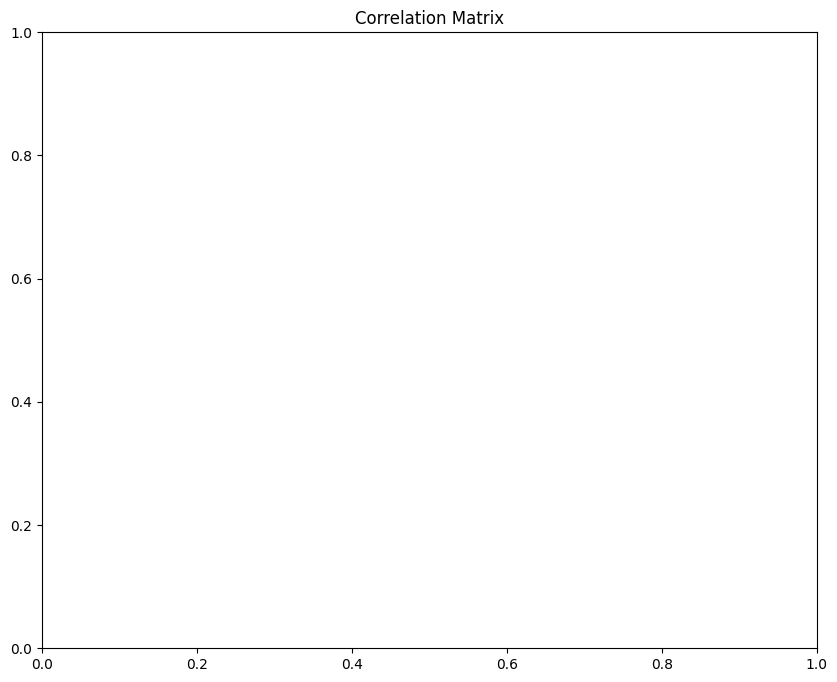

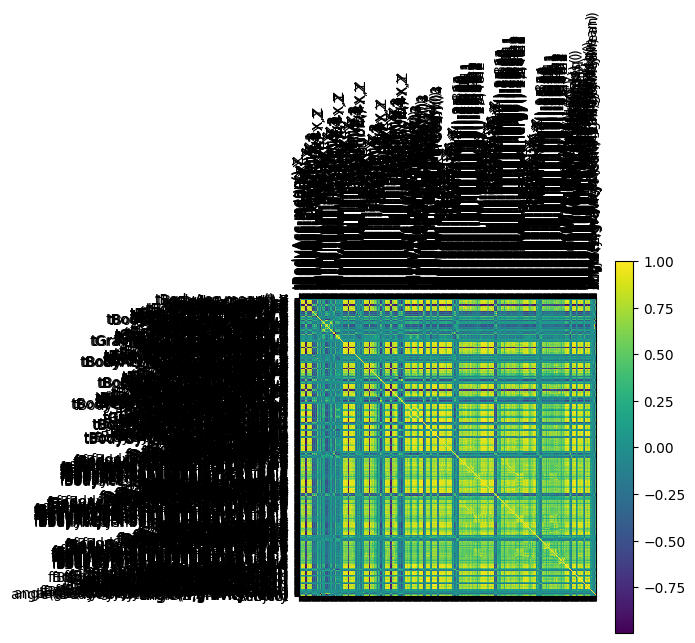

In [ ]:
# Plot correlation matrix
corr_matrix = df_train.corr()
plt.figure(figsize=(10, 8))
plt.title('Correlation Matrix')
plt.matshow(corr_matrix, cmap='viridis')
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.colorbar()
plt.show()

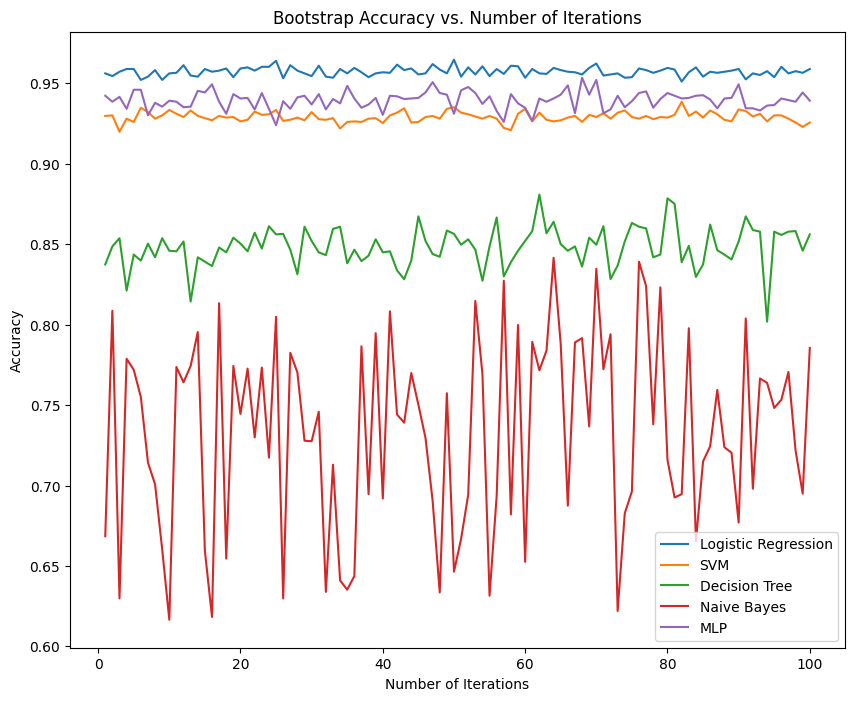

In [ ]:
import warnings
from sklearn.exceptions import ConvergenceWarning

# Plot Bootstrap Accuracy vs. Number of Iterations for each model
plt.figure(figsize=(10, 8))
plt.title('Bootstrap Accuracy vs. Number of Iterations')

# Suppress convergence warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)

for name, model in models:
    accuracies = bootstrap(model, X_train, y_train, X_test, y_test)
    plt.plot(range(1, len(accuracies)+1), accuracies, label=name)

plt.xlabel('Number of Iterations')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
# Calculate error rates
error_rates = {}
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    error_rates[name] = {'MAE': mae, 'RMSE': rmse}

In [ ]:
# Compare results in tabular format (Accuracy)
accuracy_df = pd.DataFrame.from_dict(results, orient='index', columns=['Accuracy'])
uncertainty_df = pd.DataFrame.from_dict(uncertainties, orient='index', columns=['Uncertainty'])
accuracy_df = accuracy_df.join(uncertainty_df)
print('\nAccuracy and Uncertainty:')
print(accuracy_df)


Accuracy and Uncertainty:
                     Accuracy  Uncertainty
Logistic Regression  0.957190     0.002346
SVM                  0.929566     0.002969
Decision Tree        0.847221     0.010631
Naive Bayes          0.733115     0.057086
MLP                  0.940081     0.004367


In [ ]:
# Compare error rates in tabular format
error_df = pd.DataFrame.from_dict(error_rates, orient='index')
print('\nError Rates:')
print(error_df)


Error Rates:
                          MAE      RMSE
Logistic Regression  0.053953  0.294158
SVM                  0.079063  0.320650
Decision Tree        0.185612  0.508162
Naive Bayes          0.277570  0.671288
MLP                  0.074992  0.354811


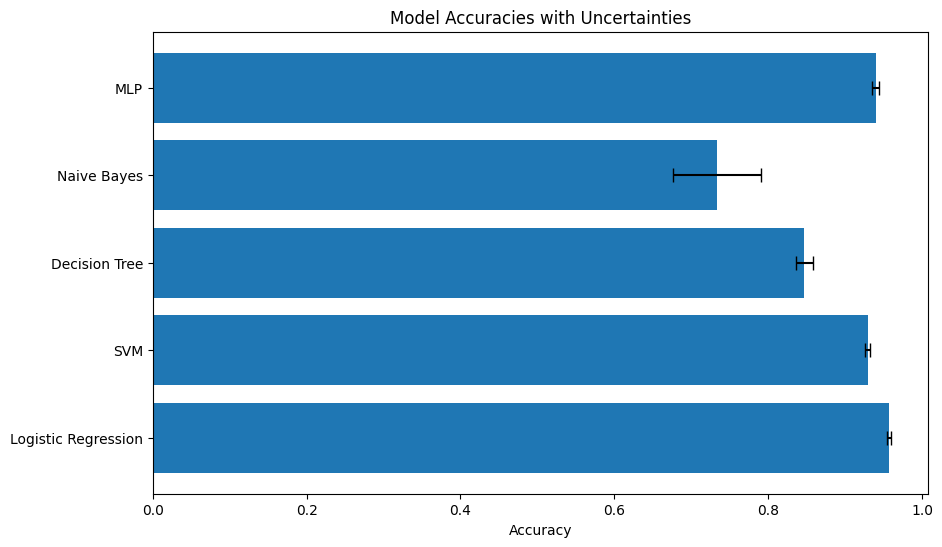

In [ ]:
# Draw plots for accuracy and error rate separately
plt.figure(figsize=(10, 6))
plt.barh(accuracy_df.index, accuracy_df['Accuracy'], xerr=accuracy_df['Uncertainty'], capsize=5)
plt.xlabel('Accuracy')
plt.title('Model Accuracies with Uncertainties')
plt.show()

<Figure size 1000x600 with 0 Axes>

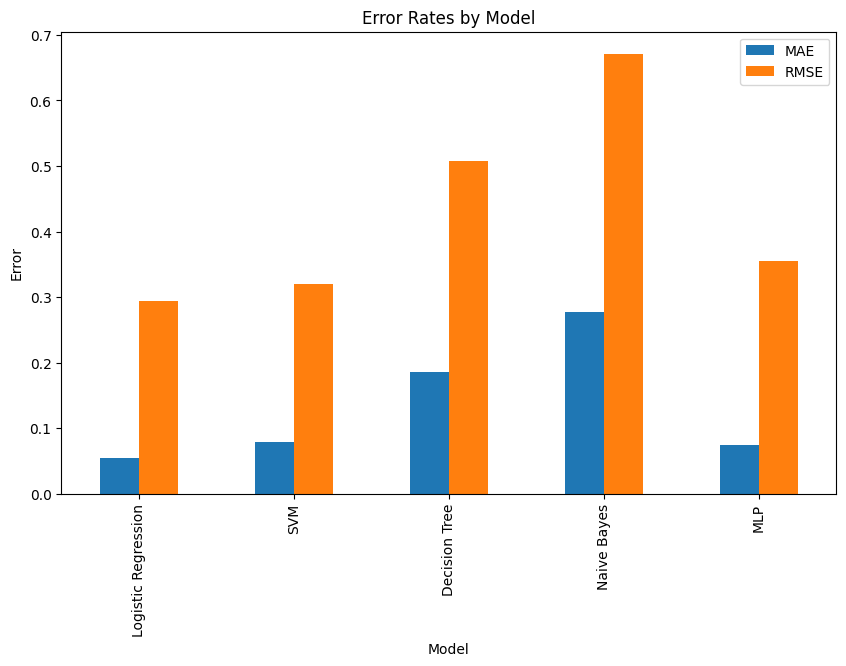

In [ ]:
plt.figure(figsize=(10, 6))
error_df.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Model')
plt.ylabel('Error')
plt.title('Error Rates by Model')
plt.legend(['MAE', 'RMSE'])
plt.show()